In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

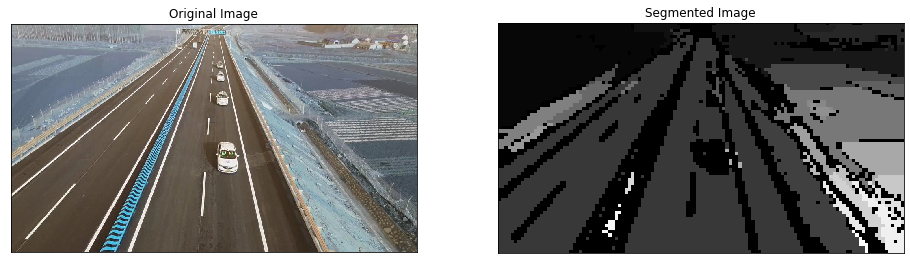

In [2]:
img= cv2.imread('img/show.jpg') 
labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

n = 0
while(n<3):
    labimg = cv2.pyrDown(labimg)
    n = n+1

feature_image=np.reshape(labimg, [-1, 3])
rows, cols, chs = labimg.shape

db = DBSCAN(eps=5, min_samples=10, metric = 'euclidean',algorithm ='auto')
db.fit(feature_image)
labels = db.labels_

indices = np.dstack(np.indices(labimg.shape[:2]))
xycolors = np.concatenate((labimg, indices), axis=-1) 
feature_image2 = np.reshape(xycolors, [-1,5])
db.fit(feature_image2)
labels2 = db.labels_

figure_size = 16
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(np.reshape(labels2, [rows, cols]),cmap = 'gray')
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
plt.show()